In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from tqdm import tqdm
from keras.optimizers import SGD

In [10]:
x_line = np.linspace(-0.5,0.5,200)
noise = np.random.normal(size=200,scale=0.02)
y_line = np.square(x_line) + noise

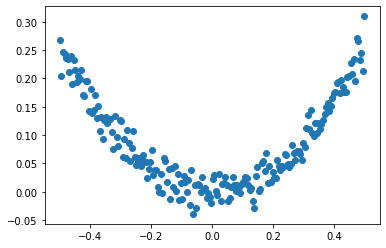

In [11]:
plt.scatter(x_line,y_line)

In [82]:
sgd = SGD(learning_rate=0.1)

In [83]:
model = Sequential()
model.add(Dense(units=10, input_dim=1,activation='tanh'))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=1, activation='tanh'))
model.compile(optimizer=sgd,loss='mse')

In [84]:
for i in tqdm(range(3000)):
    cost = model.train_on_batch(x_line,y_line)

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:16<00:00, 177.50it/s]


In [85]:
cost

0.0004271610814612359

In [86]:
W,b = model.layers[0].get_weights()
print('W:',W,'b:',b,)

W: [[-0.734421    0.4432075  -0.2507368   0.16614759 -0.16071144 -0.85680115
   0.24504188 -0.51462984  0.5032359  -0.23372714]] b: [ 0.09777735  0.01718726  0.11185996  0.0786203   0.21407676 -0.03396607
 -0.18064675 -0.00785229 -0.17716698  0.14768116]


7/7 [==============================] - 0s 994us/step


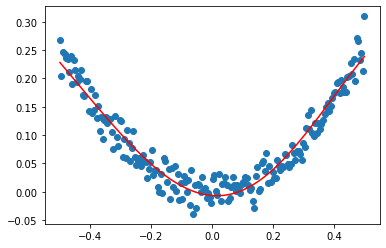

In [87]:
y_pre = model.predict(x_line)
plt.scatter(x_line,y_line)
plt.plot(x_line,y_pre,'r')
plt.show()